In [4]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
from data_clean import clean_data, get_features, createDataframe

In [28]:
group_size = 24

In [29]:
dataFrames = []

In [31]:
dataFrames.append(createDataframe('raw data/2020-12-10tony650steps.csv', group_size, 178))
dataFrames.append(createDataframe('raw data/2020-12-10mary1.csv', group_size, 150))
dataFrames.append(createDataframe('raw data/161cm walk1.csv', group_size, 161))
dataFrames.append(createDataframe('raw data/173cm walk1.csv', group_size, 173))
dataFrames.append(createDataframe('raw data/2020-12-10peter166.csv', group_size, 166))
dataFrames.append(createDataframe('raw data/176cm walk.csv', group_size, 176))
dataFrames.append(createDataframe('raw data/173cm walk2.csv', group_size, 173))
dataFrames.append(createDataframe('raw data/173cm walk3.csv', group_size, 173))
dataFrames.append(createDataframe('raw data/2020-12-06walka.csv', group_size, 178))
dataFrames.append(createDataframe('raw data/2020-12-06walkb.csv', group_size, 178))
dataFrames.append(createDataframe('raw data/2020-12-10judy153.csv', group_size, 153))
dataFrames.append(createDataframe('raw data/2020-12-10judy2.csv', group_size, 153))
dataFrames.append(createDataframe('raw data/2020-12-10judy3.csv', group_size, 153))
dataFrames.append(createDataframe('raw data/2020-12-10andrew169.csv', group_size, 169))

In [33]:
merged_df = pd.concat(dataFrames)
sampled_df = merged_df

In [ ]:
merged_df.count()

In [19]:
merged_df.groupby(['height']).count()

,speed,distance,steps,time
height,,,,
150,2168,2168,2168,2168
153,15297,15297,15297,15297
161,3481,3481,3481,3481
166,22824,22824,22824,22824
169,4127,4127,4127,4127
173,10326,10326,10326,10326
176,6224,6224,6224,6224
178,14925,14925,14925,14925


In [60]:
sampled_df = merged_df.groupby(['height']).sample(20000, replace=True)

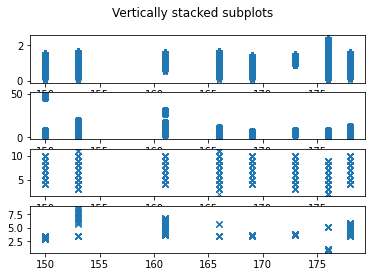

In [53]:
fig, axs = plt.subplots(4)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(sampled_df['height'], sampled_df['speed'], "*")
axs[1].plot(sampled_df['height'], sampled_df['distance'], "o")
axs[2].plot(sampled_df['height'], sampled_df['steps'], "x")
axs[3].plot(sampled_df['height'], sampled_df['time'], "x")

In [61]:
sampled_df

,speed,distance,steps,time,height
315,0.962639,48.046894,6.0,3.038,150
1395,1.527222,6.214809,7.0,3.444,150
1697,1.497222,4.437070,7.0,3.478,150
2381,1.471007,6.665664,7.0,3.441,150
1269,1.552778,6.575928,6.0,3.436,150
...,...,...,...,...,...
364,1.255174,3.146621,6.0,3.438,178
1780,1.474931,4.065559,5.0,3.430,178
6805,1.304792,3.934221,7.0,3.463,178
6419,1.387431,6.628868,5.0,3.450,178


In [62]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pre

X = sampled_df[['speed','distance','steps', 'time']].to_numpy()
y = sampled_df['height'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.95)

scaler = pre.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)



In [63]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_model = make_pipeline( PolynomialFeatures(4), LinearRegression())
result_poly = poly_model.fit(X_train, y_train)
result_poly.score(X_test, y_test)

0.2935554216604258

In [27]:
mpl_model = make_pipeline( MLPRegressor(hidden_layer_sizes=(800,800,800,800,800)))
result_mpl = mpl_model.fit(X_train_scaled, y_train)
result_mpl.score(X_test_scaled, y_test)

0.20553501945731323

In [42]:
mpl_model = make_pipeline( MLPRegressor(hidden_layer_sizes=(40,40,40,40,40,40,40,40,40,40,40)))
result_mpl = mpl_model.fit(X_train_scaled, y_train)
result_mpl.score(X_test_scaled, y_test)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.3578101043989602

In [ ]:
mpl_model3 = make_pipeline( MLPRegressor(hidden_layer_sizes=(100,100,100), max_iter=2000, tol=0.01))
result_mpl3 = mpl_model3.fit(X_train_scaled, y_train)
result_mpl3.score(X_test_scaled, y_test)

In [69]:
y_predict = result_mpl.predict(X_train_scaled)

In [73]:
(y_predict - y_train).min()

-15.691537673805328

In [35]:
len(y_predict)

2444

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_class = make_pipeline( 
        RandomForestClassifier(n_estimators=400,
        max_depth=15, min_samples_leaf=15)
    )

In [ ]:
model_class.fit(X_train_scaled, y_train)
model_class.score(X_test_scaled, y_test)